### Nonlinear Option Pricing, Master 2 Probabilités et Finance, Sorbonne Université and École polytechnique
# Homework III (mandatory: 30% of final grade)

### Due Date: 11:55 PM Tuesday, February 25, 2025
You should turn in the notebook on the Moodle course website.

Please comment your code properly.

Before you turn in the notebook, press the "Run all cells" button in the toolbar, and make sure all the calculation results and graphs are produced correctly in a reasonable time frame, and then save the notebook.

# Uncertain Mortality Model vs American Options

#### Re-insurance Deals

In this assignment, we study the *Uncertain Mortality Model* for the pricing of reinsurance deals. For the sake of simplicity, in this assignment we only consider one type of default: the risk of death.

We consider the following reinsurance product:

- At maturity, if the insurance subscriber is alive, the issuer delivers a put on the underlying $X$

$$
u^\textrm{mat}( x) = (K_\textrm{mat} - x)_+.
$$

- At the time of death, if it is before the maturity, the issuer delivers an exit payoff, typically another put on the underlying $X$.

$$
u^D(t, x) = (K_D - x)_+.
$$

- The subscriber pays a constant fee $α\Delta t$ at every time step until death or the maturity or the product

- The insurance sells a large number of these contracts to subscribers. We assume that the times of death of the subscribers $\tau^D$ are independent, and identically distributed, and also independent of the underlying's stock price.

- We assume that the underlying's risk neutral price dynamics is the Black-Scholes model with zero interest rate/repo/dividend yield

$$
dX_t = \sigma X_t d W_t.
$$

#### The Insurers' Approach and Risk-Neutral Pricing

This contract shows two types of risk: the times of death of the subscribers and the changes in the price of the underlying. 

In this case, the issuer can apply the insurer's approach to the risk of death times, i.e., the law of large numbers. The more people buy the contract, the less risk.

Choosing a risk-neutral measure under which the death times $\tau^D$ have the same distribution as under the historical probability measure is equivalent to applying the arbitrage-pricing approach to the financial risk insurer's rule on the risk of death. The price of the contract is then

$$
u(t, x) = \mathbb{E}^\mathbb{Q}_{t, x} \left[u^\textrm{mat}(X_T) \mathbb{1}_{\tau^D \geq T} -\int_t^T\alpha\mathbb{1}_{\tau^D>s}ds+ u^D(\tau^D, X_{\tau^D}) \mathbb{1}_{\tau^D < T} \right].
$$

#### Deterministic Death Rate

If the death intensity is a deterministic function $\lambda_t^D$ (i.e. $\tau^D$ has an exponential distribution with time-dependent intensity $\lambda_t^D$), then we have seen that $u$ is the solution to the linear PDE

$$
\left\{\begin{array}{l}
\partial_t u + \frac{1}{2} \sigma^2 x^2 \partial_x^2 u -\alpha + \lambda_t^D \cdot (u^D - u) = 0,\\
u(T, \cdot) \equiv u^\textrm{mat}.
\end{array}\right.
$$

#### Uncertain Mortality Model

If the death rate is uncertain, we assume that it is adapted (i.e., it does not look into the future) and belongs to a moving corridor
$\left[\underline{\lambda}_t, \overline{\lambda}_t\right]$. The most conservative way to price the contract is to compute the (financially) worst death rate process $\lambda_t^D$ as being chosen so as to maximize the value of the contract. The resulting HJB equation is

$$
\left\{\begin{array}{l}
\partial_t u + \frac{1}{2} \sigma^2 x^2 \partial^2_x u -\alpha + \Lambda^D(t, u^D - u) \cdot (u^D - u) = 0,\\
u(T, \cdot) \equiv u^\textrm{mat},
\end{array}\right.
$$
where the function $\Lambda^D$ is defined by
$$
\Lambda^D (t, y) = \left\{\begin{array}{l}
    \overline{\lambda}^D_t \quad \textrm{if} \ y \geq 0, \\
    \underline{\lambda}^D_t \quad \textrm{otherwise.}
\end{array}\right.
$$

## Link with $1$-BSDE and Numerical Schemes

From the Pardoux-Peng theorem, we know that the solution $u(0, x)$ can be represented as the solution $Y_0^x$ to the $1$-BSDE

$$
dY_t = -f(t, X_t, Y_t, Z_t) \, dt + Z_t \, dW_t,
$$

with the terminal condition $Y_T = u^\textrm{mat} (X_T)$, where $X_0 = x$ and

$$
f(t, x, y, z) = -\alpha + \Lambda^D(t, u^D(t, x) - y) \cdot (u^D(t, x) - y).
$$


## BSDE Discretization

### Explicit Euler Schemes

\begin{align*}
Y_{t_n} =& \ u^{\text{mat}}\left(X_{t_n}\right)\\
Y_{t_{i - 1}} =& \ \mathbb{E}^\mathbb{Q}_{i - 1} [ Y_{t_i} ] -\alpha\Delta t_i + \Lambda^D \left(t_{i - 1}, u^D(t_{i - 1} , X_{t_{i - 1}}) - \mathbb{E}^\mathbb{Q}_{i - 1} [ Y_{t_i} ]\right) \cdot \left( u^D(t_{i - 1}, X_{t_{i - 1}}) - \mathbb{E}^\mathbb{Q}_{i - 1} [ Y_{t_i} ] \right) \Delta t_i\\
=& -\alpha\Delta t_i + \left( \mathbb{E}^\mathbb{Q}_{i - 1} [ Y_{t_i} ] \left( 1 - \overline{\lambda}^D \Delta t_i \right) +
u^D(t_{i - 1}, X_{t_{i - 1}}) \overline{\lambda}^D \Delta t_i \right) \mathbb{1}_{u^D\left(t_{i - 1}, X_{t_{i - 1}}\right) \geq \mathbb{E}_{i-1}[Y_{t_i}]}\\
& + \left( \mathbb{E}^\mathbb{Q}_{i - 1} [ Y_{t_i} ] \left( 1 - \underline{\lambda}^D \Delta t_i \right) +
u^D(t_{i - 1}, X_{t_{i - 1}}) \underline{\lambda}^D \Delta t_i \right) \mathbb{1}_{u^D\left(t_{i - 1}, X_{t_{i - 1}}\right) < \mathbb{E}_{i-1}[Y_{t_i}]}.
\end{align*}

### Implicit Euler Scheme

\begin{align*}
Y_{t_n} =& \ u^{\text{mat}}\left(X_{t_n}\right)\\
Y_{t_{i - 1}} =& \ \mathbb{E}^\mathbb{Q}_{i - 1} [Y_{t_i}] -\alpha\Delta t_i+ \Lambda^D \left(t_{i - 1}, u^D(t_{i - 1}, X_{t_{i - 1}}) - Y_{t_{i - 1}}\right) \cdot \left( u^D(t_{i - 1}, X_{t_{i - 1}}) - Y_{t_{i - 1}} \right) \Delta t_i.
\end{align*}

The implicit scheme involves $Y_{t_{i - 1}}$ on both sides of the equation, which generally requires a root-finding routine to find $Y_{t_{i - 1}}$. However in this specific case, it can be shown that 

\begin{equation}u^D(t_{i-1}, X_{t_{i-1}}) \geq Y_{t_{i-1}}\quad\text{if and only if}\quad u^D(t_{i-1}, X_{t_{i-1}}) \geq \mathbb{E}^{\mathbb{Q}}_{i-1}\left[Y_{t_i}\right]-\alpha\Delta t_i.\end{equation}

Thus

\begin{split}
Y_{t_{i - 1}} =& \frac{1}{1 + \overline{\lambda}^D \Delta t_i} \left( \mathbb{E}^\mathbb{Q}_{i - 1} [ Y_{t_i} ] - \alpha\Delta t_i +
u^D(t_{i - 1}, X_{t_{i - 1}}) \overline{\lambda}^D \Delta t_i \right) \mathbb{1}_{u^D\left(t_{i - 1}, X_{t_{i - 1}}\right) \geq \mathbb{E}_{i-1}[Y_{t_i}]-\alpha\Delta t_i}\\
& + \frac{1}{1 + \underline{\lambda}^D \Delta t_i} \left( \mathbb{E}^\mathbb{Q}_{i - 1} [ Y_{t_i} ] -\alpha\Delta t_i +
u^D(t_{i - 1}, X_{t_{i - 1}}) \underline{\lambda}^D \Delta t_i \right) \mathbb{1}_{u^D(t_{i - 1}, X_{t_{i - 1}}) < \mathbb{E}_{i-1}[Y_{t_i}]-\alpha\Delta t_i}.
\end{split}



In [75]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import seaborn as sns
import matplotlib as mpl

In [57]:
def blackscholes_mc(S=100, vol=0.2, r=0, q=0, ts=np.linspace(0, 1, 13), npaths=10):
    """Generate Monte-Carlo paths in Black-Scholes model.

    Parameters
    ----------
    S: scalar
        The spot price of the underlying security.
    vol: scalar
        The implied Black-Scholes volatility.
    r: scalar
        The annualized risk-free interest rate, continuously compounded.
    q: scalar
        The annualized continuous dividend yield.
    ts: array_like
        The time steps of the simualtion
    npaths: int
        the number of paths to simulate

    Returns
    -------
    paths: ndarray
        The Monte-Carlo paths.
    """
    nsteps = len(ts) - 1
    ts = np.asfarray(ts)[:, np.newaxis]
    W = np.cumsum(np.vstack((np.zeros((1, npaths), dtype=np.float64),
                             np.random.randn(nsteps, npaths) * np.sqrt(np.diff(ts, axis=0)))),
                  axis=0)
    paths = np.exp(-0.5*vol**2*ts + vol*W)*S*np.exp((r-q)*ts)
    return paths

def blackscholes_price(K, T, S, vol, r=0, q=0, callput='call'):
    """Compute the call/put option price in the Black-Scholes model
    
    Parameters
    ----------
    K: scalar or array_like
        The strike of the option.
    T: scalar or array_like
        The maturity of the option, expressed in years (e.g. 0.25 for 3-month and 2 for 2 years)
    S: scalar or array_like
        The current price of the underlying asset.
    vol: scalar or array_like
        The implied Black-Scholes volatility.
    r: scalar or array_like
        The annualized risk-free interest rate, continuously compounded.
    q: scalar or array_like
        The annualized continuous dividend yield.
    callput: str
        Must be either 'call' or 'put'.

    Returns
    -------
    price: scalar or array_like
        The price of the option.

    Examples
    --------
    >>> blackscholes_price(95, 0.25, 100, 0.2, r=0.05, callput='put')
    1.5342604771222823
    """
    F = S*np.exp((r-q)*T)
    v = np.sqrt(vol**2*T)
    d1 = np.log(F/K)/v + 0.5*v
    d2 = d1 - v
    try:
        opttype = {'call':1, 'put':-1}[callput.lower()]
    except:
        raise ValueError('The value of callput must be either "call" or "put".')
    price = opttype*(F*norm.cdf(opttype*d1)-K*norm.cdf(opttype*d2))*np.exp(-r*T)
    return price


def pwlinear_basis(xknots):
    """Basis that represent a piecewise linear function with given knots"""
    fs = [lambda x: np.ones_like(x, dtype=np.float64), lambda x: x-xknots[0]]
    fs.extend([lambda x, a=xknots[i]: np.maximum(x-a, 0) for i in range(len(xknots))])
    return fs


def pwlinear_fit(xdata, ydata, xknots):
    """Fit a piecewise linear function with xknots to xdata and ydata"""
    fs = pwlinear_basis(xknots)
    A = np.vstack([f(xdata) for f in fs]).T
    ps = np.linalg.lstsq(A, ydata, rcond=None)[0]
    return ps, fs

<b>Note.</b> To be more specific about the payouts of the product, we make the following assumptions:

- We assume that all transactions occur at the end of the month, i.e. the insurance subsriber is expected to pay a fee of $\alpha/12$ at the end of each month; if the subscriber dies in the middle of the month, the death payment will be made at the end of that month. 

- If the death occurs at the maturity, we assume that the death comes first and the death payment $u^D$ will be made.

## Assignment III

<b style="color:darkorange">Question 1</b> (Deterministic Mortality Rate Model)

We assume that the underlying's risk neutral price dynamics is the Black-Scholes model with zero interest rate/repo/dividend yield

$$dX_t = \sigma X_t d W_t,\quad X_0=100,\quad\sigma=0.3$$

We shall price the reinsurance deal using two Monte Carlo methods explained below.

<b>(a).</b> (Direct simulation of death times) Implement a Monte Carlo simulation by directly simulating death time $\tau^D$ for each path to estimate the quantity

$$u(t, x) = \mathbb{E}^\mathbb{Q}_{t, x} \left[u^\textrm{mat}(X_T) \mathbb{1}_{\tau^D \geq T} - \int_t^T\alpha \mathbb{1}_{\tau^D> s}ds
+ u^D(\tau^D, X_{\tau^D}) \mathbb{1}_{\tau^D < T} \right],$$

when $T=10$, $K_{\text{mat}}=90$, $K_D=100$, $\alpha=3$, and $\tau^D$ has an exponential distribution of constant intensity $\lambda^D=0.025$. Use monthly time steps.

<b>(b).</b> (Averaing over death events) Using the Feynman-Kac formula, derive a stochastic representation of the linear PDE 

$$\left\{\begin{array}{l}\partial_t u + \frac{1}{2}\sigma^2 x^2 \partial_x^2 u - \alpha + \lambda^D \cdot (u^D - u) = 0\\
        u(T, x) \equiv u^\textrm{mat}(x)\end{array}\right.$$
        
that does not involve simulating death times $\tau^D$. Explain how one can get this stochastic representation from the one given in (a). Implement the corresponding Monte Carlo simulation to estimate $u(0,X_0)$.

In [181]:
sns.set_style("whitegrid")
mpl.rcParams['figure.dpi'] = 100
params_grid = {"color": 'lightgrey', "linestyle": 'dotted', "linewidth": 0.7 }
# note that lambda is a reserved keyword in python, so we use lambd instead

def exponential_samples(n, lambd):# mean equal to 1/lambda
    """Generate n samples from exponential distribution with rate lambd"""
    return -np.log(np.random.rand(n))/lambd


T=10
K=90
K_D=100
alpha=3
n=1
lambd=0.025 #mean time of death is 40 months
exponential_samples(n, lambd)
S=100
vol=0.3
r=0
q=0
npaths=10
ts=np.linspace(0, T, T*12+1)
paths=blackscholes_mc(S, vol, r, q, ts, npaths)
stoping_times=(exponential_samples(npaths, lambd))

In [169]:


#stoping_times=np.minimum(exponential_samples(npaths, lambd),np.ones(npaths)*T*12)
#stoping_times_value=[, for stop in stoping_times ]

# in case death occurs before T we consider the 
#blackscholes_price(K, T, S, vol, r=0, q=0, callput='call')


In [172]:
def stoping_times_value(path,stoping_time):
    v1=int(stoping_time)
    if v1>=T*12 : return path[-1]
    v2=int(stoping_time)+1
    dec=stoping_time-v1
    value=dec*path[v2]+(1-dec)*path[v1]
    return value

def stoping_times_put_value(stoping_time,path):

    if stoping_time==T*12: return max(0,K_D-path[-1])
    elif stoping_time>T*12:return max(0,K-path[-1])
    else :
        v1=int(stoping_time)
        dec=stoping_time-v1
        v2=v1+1
        value=dec*path[v2]+(1-dec)*path[v1]
        return max(0,K-value)

  
   
def fee(stoping_time,path):
    if stoping_time>=T*12 : return alpha*T*12
    else:
        v2=int(stoping_time)+1
        return alpha*v2*12

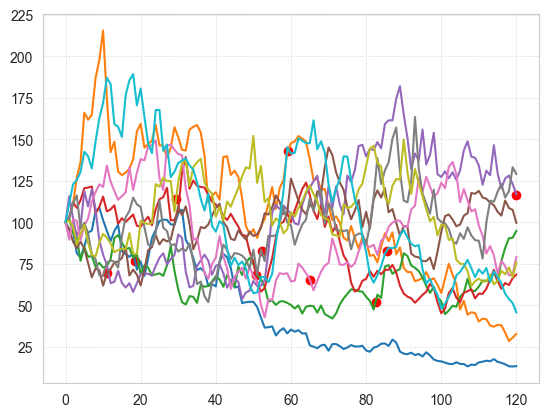

In [171]:
fig, ax = plt.subplots()
ax.grid(**params_grid)

for n,path in enumerate(np.transpose(paths)):
    
    plt.plot(path)
    #if stoping_times_value(path,stoping_times[n])
    ax.scatter(min(stoping_times[n],T*12),stoping_times_value(path,stoping_times[n]),color='r')
    
#for m,t in enumerate(ts):
    #for i in range(len(paths[m])):
        #ax.scatter(t,paths[m][i])


In [179]:
#computing means of the values at time stopings 
payoffs=np.zeros(np.transpose(npaths))
for n,path in enumerate(np.transpose(paths)):   
    payoffs[n]=-fee(stoping_times[n],path)+stoping_times_put_value(stoping_times[n],path)
print("le prix est :",np.mean(payoffs)) 

le prix est : -1678.7450582164718


The Feynman-Kac formula shows that the solution of the eqaution  $$\left\{\begin{array}{l}\partial_t u + \frac{1}{2}\sigma^2 x^2 \partial_x^2 u - \alpha + \lambda^D \cdot (u^D - u) = 0\\
        u(T, x) \equiv u^\textrm{mat}(x)\end{array}\right.$$
is given by $$u(t, x) = \mathbb{E}^\mathbb{Q}_{t, x} \left[ e^{-\int_t^T \lambda_D(s) \, ds}  u_{\text{mat}}(X_T)+ \int_t^T e^{-\int_t^s{\lambda_D(v)}dv}(-\alpha + u^D(s, X_{s}) )ds \right],$$

this stochastique representation can be derived from a , using the fact that the death times is independent of X_t and follows a poisson process , indeed we have:

$$u(t, x) = \mathbb{E}^\mathbb{Q}_{t, x} \left[u^\textrm{mat}(X_T) \mathbb{1}_{\tau^D \geq T} - \int_t^T\alpha \mathbb{1}_{\tau^D> s}ds
+ u^D(\tau^D, X_{\tau^D}) \mathbb{1}_{\tau^D < T} \right],$$


$$
= \mathbb{E}^{Q}_{t,x} \left[ u_{\text{mat}}(X_T) 1_{\tau_D \geq T}  \right] - \mathbb{E}^{Q}_{t,x} \left[\int_t^T \alpha 1_{\tau_D \geq s} \, ds\right]

+ \mathbb{E}^{Q}_{t,x} \left[ u_D(\tau_D, X_{\tau_D}) 1_{\tau_D < T}  \right]
$$

$$
\mathbb{E}^{Q}_{t,x} \left[ u_{\text{mat}}(X_T) 1_{\tau_D \geq T}  \right] = e^{-\int_t^T \lambda_D(s) \, ds} \mathbb{E}^{Q}_{t,x} \left[ u_{\text{mat}}(X_T) \right]
$$

$$
\mathbb{E}^{Q}_{t,x} \left[  \int_t^T \alpha 1_{\tau_D \geq s}  \, ds \right] = \alpha \int_t^T e^{-\int_t^s \lambda_D(v) \, dv} \, ds 
$$

$$
\mathbb{E}^{Q}_{t,x} \left[ u_D(\tau_D, X_{\tau_D}) 1_{\tau_D < T}  \right] = \mathbb{E}^{Q}_{t,x} \left[ \int_t^T u_D(s, X_s) \lambda_D(s) e^{-\int_t^s \lambda_D(v) \, dv} \, ds \right]
$$

this imply: 
$$u(t, x) = \mathbb{E}^\mathbb{Q}_{t, x} \left[ e^{-\int_t^T \lambda_D(s) \, ds}  u_{\text{mat}}(X_T)+ \int_t^T e^{-\int_t^s({\lambda_v^D}+{\lambda_v^L})dv}(-\alpha + u^D(s, X_{s}) )ds \right],$$

Implement the corresponding Monte Carlo simulation to estimate $ u(0,X_0)$.

$$u(t, x) = \mathbb{E}^\mathbb{Q}_{t, x} \left[ e^{-(T-t) \lambda^D}  u_{\text{mat}}(X_T)+ \int_t^T e^{-(s-t){\lambda^D}}(-\alpha + u^D(s, X_{s}) )ds \right],$$

<b style="color:darkorange">Question 2</b> (Uncertain Mortality Rate Model - BSDE)

Assume that $\lambda^D_t \in \left[\underline{\lambda}^D, \overline{\lambda}^D \right]$, where $\underline{\lambda}^D=0.005$ and $\overline{\lambda}^D=0.04$.

<b>(a).</b> Implement the implicit Euler scheme for BSDE. Use piecewise-linear fit with 10 knots to estimate the conditional expectation $\mathbb{E}^{\mathbb{Q}}_{i-1}\left[Y_{t_i}\right]$. Use the numpy function percentile to define the minimum and maximum knots. Use the percentiles 1 and 99 percent. Use 100,000 paths.

<b>(b).</b> Run an independent new simuation. Use the estimates of $\mathbb{E}^{\mathbb{Q}}_{i-1}\left[Y_{t_i}\right]$ obtained in (a) to get a lower bound estimate.

<b>(c).</b> How does the price compare with the price in the model with deterministic mortality rate $\underline{\lambda}^D$? with deterministic mortality rate $\overline{\lambda}^D$? Check numerically.

<b style="color:darkorange">Question 3</b> (Uncertain Mortality Rate Model - Longstaff and Schwartz) In addition to the BSDE simulation, the reinsurance deals can be priced by adapting the Longstaff-Schwartz algorithm. An implementation of the Longstaff-Schwartz algorithm is provided below for your convenience.

The same lower and upper bounds of $\lambda_t^D$ are used as Question 2.

<b>(a).</b> In the example code, we use European put price (the strike is taken to be the average of $K_{\text{mat}}$ and $K_D$) and constant as basis functions to estimate the sum of future payoffs. Modify the code by using the piecewise-linear fit to estimate the sum of future payoffs.

<b>(b).</b> Compare the BSDE scheme with the Longstaff-Schwartz-like scheme in terms of variance. For each method run the two-step procedure (regression and indedenpent pricing) 20 times to estimate variance. Use 5000 paths for regression and 50000 for indepedent pricing.

<b>(c).</b> What is approximately the value of the fee $\alpha$ that makes the deal costless at inception?

<b style="color:darkorange">Question 4.</b> Set $K_D=0$, and all the other parameters remain the same, in particualr $\alpha=3$. Then the default event is equivalent to lapse (with no mortality payoff). It has been observed that insurance subscribers do not lapse optimally, which explains the use of the uncertain lapse model with minimum and maximum lapse rates $\underline{\lambda}$, $\overline{\lambda}$. 

<b>(a).</b> If insurance subscribers were to lapse optimally, i.e., exercise optimally their option to lapse, how would you price the contract?

<b>(b).</b> Explain how you can get this price (from optimal exercise) in the uncertain lapse model. Reuse the code provided in Question 3 to show your result (you may have to change some parameters in the code).

<b>(c).</b> Implement Longstaff-Schwartz algorithm to price the American option with payoff $u^D=0$ (Always perform a second indepedent run to get a clean lower bound price). Compare the price from uncertain lapse model in part (b) with the American price.